In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('credit_scoring.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   135155 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 9   NumberOfDependents                    146076 non-null  float64
 10  RealEstateLoansOrLines                150000 non-null  object 
 11  

In [18]:
df = df.fillna(df.median(numeric_only=True))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 9   NumberOfDependents                    150000 non-null  float64
 10  RealEstateLoansOrLines                150000 non-null  object 
 11  

In [20]:
le = LabelEncoder()
df['GroupAge'] = le.fit_transform(df['GroupAge'])
df['RealEstateLoansOrLines'] = le.fit_transform(df['RealEstateLoansOrLines'])

In [21]:
df['GroupAge'].unique()

array([2, 1, 3, 4, 0])

In [22]:
df['RealEstateLoansOrLines'].unique()

array([0, 1, 2, 4, 3])

In [23]:
exclude_columns = ['SeriousDlqin2yrs', 'RealEstateLoansOrLines']
cols = [col for col in df.select_dtypes(include=[np.number]).columns if col not in exclude_columns]
outliers_mask = np.abs(stats.zscore(df[cols])) > 3
df = df[~outliers_mask.any(axis=1)]

In [ ]:
df = df[df['RevolvingUtilizationOfUnsecuredLines'] <= 6]

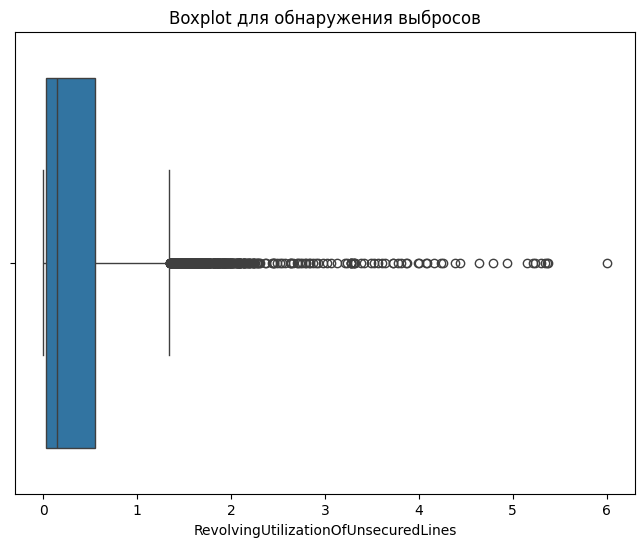

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='RevolvingUtilizationOfUnsecuredLines')
plt.title('Boxplot для обнаружения выбросов')
plt.show()

In [26]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,RealEstateLoansOrLines,GroupAge
count,145565.000000,145565.000000,145565.000000,145565.000000,145565.000000,145565.000000,145565.000000,145565.000000,145565.000000,145565.000000,145565.000000,145565.000000
mean,0.065661,0.321627,52.225892,0.243259,301.022977,6116.172040,8.200460,0.090338,0.064755,0.707320,0.068911,2.769945
std,0.247690,0.364607,14.039375,0.692302,874.501924,4015.508677,4.631629,0.474328,0.329038,1.040161,0.283312,0.992767
min,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.029415,42.000000,0.000000,0.174510,3868.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.151419,52.000000,0.000000,0.364756,5400.000000,8.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.000000,0.554913,62.000000,0.000000,0.856699,7294.000000,11.000000,0.000000,0.000000,1.000000,0.000000,4.000000
max,1.000000,6.000000,94.000000,12.000000,6466.000000,45000.000000,23.000000,12.000000,11.000000,4.000000,3.000000,4.000000


In [27]:
df.to_csv('cleaned_df.csv', index=False)